# Coursework 2

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework2.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import pickle

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer, BatchNormalizationLayer, ConvolutionalLayer,ReshapeLayer, MaxPoolingLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule, AdamLearningRule, RMSpropLearningRule
from mlp.optimisers import Optimiser

from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# %matplotlib notebook
%matplotlib inline
plt.style.use('ggplot')
seed = 10102016 

In [8]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

def make_neuralNet_model(activation_function, number_layers):
    layers_and_activation = ([AffineLayer(hidden_dim, hidden_dim), 
    activation_function] * (number_layers-1))
    return MultipleLayerModel([AffineLayer(input_dim, hidden_dim)] + 
        layers_and_activation + [AffineLayer(hidden_dim, output_dim)])

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.


# Seed a random number generator
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']


In [10]:
#setup hyperparameters
learning_rate = 0.01
num_epochs = 150
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 150
num_hidden_layers = 2
activation_function = ReluLayer()
activation_functions = [SigmoidLayer(),ReluLayer(),LeakyReluLayer(),ELULayer()]

['inputs', 'targets']
['inputs', 'targets']


HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

Epoch 150: 489.5s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


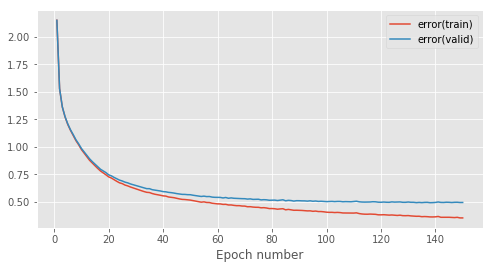

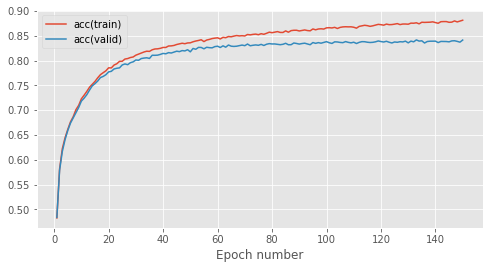

In [11]:
file_name = 'exp_batch_best'
file_object = open(file_name, 'wb')
# learning_rules=[GradientDescentLearningRule(learning_rate=learning_rate), AdamLearningRule(learning_rate=learning_rate), RMSpropLearningRule(learning_rate=learning_rate)]
for learning_rate in [0.01]:
    train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
    valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = make_neuralNet_model(activation_function,2)
    
    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
    
    #Remember to use notebook=False when you write a script to be run in a terminal
    name = ("neuralNet",3,learning_rate, "gradientDescent","normalised")
    a = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    pickle.dump((name,a),file_object)
file_object.close()